In [1]:
import torch 
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# df = pd.read_csv('C:/Users/louis/github_vs/archive/Submission.csv')
df = pd.read_csv('C:/Users/louis/github_vs/archive/fer2013/fer2013/fer2013.csv')

def get_data(str):
    data = df[df["Usage"]==str]
    data_y = data['emotion'].reset_index(drop=True)
    data_x = data['pixels'].apply( lambda x : (np.array(x.split(" ")).astype('float')/255).reshape(-1,48,48))
    data_xy = [(x,y) for x,y in zip(data_y,data_x)]
    return data_xy

batch_size = 16
trainloader = torch.utils.data.DataLoader(get_data("Training"), shuffle = False,batch_size = batch_size)
valloader = torch.utils.data.DataLoader(get_data("PublicTest"), shuffle = False,batch_size = batch_size)
testloader = torch.utils.data.DataLoader(get_data("PrivateTest"), shuffle = False,batch_size = batch_size)

class_names = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


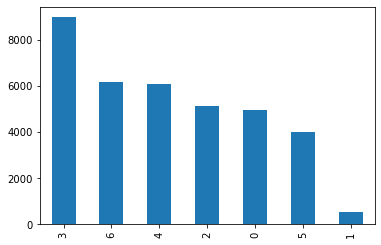

In [112]:
df['emotion'].value_counts().plot(kind = "bar")

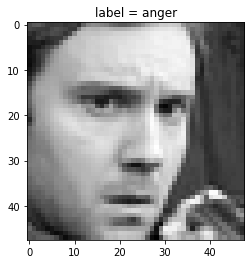

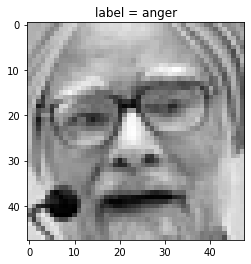

In [21]:
it = iter(trainloader)
out = it.next()
labels = out[0]
imgs= out[1]
for i in range(2):
    plt.figure()
    plt.imshow(imgs[i][0],cmap='gray')
    plt.title("label = "+class_names[labels[i]])

In [25]:
out_size = len(class_names);
scaler = 4

def build_model(order,filter_size,stride_size,pool_size,dropout_rate):


    layers = []
    
    layers.append(nn.Conv2d(in_channels =1, out_channels = scaler, kernel_size = filter_size, stride=stride_size))
    layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=pool_size,stride=stride_size))
    
    
    for i in range(1,order,2):
        print(i)
        layers.append(nn.Conv2d(scaler*i,scaler*(i+1), kernel_size = filter_size, stride=stride_size))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(scaler*(i+1),scaler*(i+2), kernel_size = filter_size, stride=stride_size))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=pool_size,stride=stride_size))
        
    w_out = scaler*int(np.floor(order/2))
    layers.append(nn.Linear(w_out,100))
    layers.append(nn.Flatten())
    layers.append(nn.Dropout(p =dropout_rate))
    layers.append(nn.ReLU())
    layers.append(nn.Flatten())
    layers.append(nn.Linear(100,out_size))     
    layers.append(nn.Softmax())

    
    model = nn.Sequential(*layers)
    return model


model = build_model(2,3,1,2,0.2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
printfreq=1000
running_loss =0

for epoch in range(1,10):
    for i, data in enumerate(trainloader):
            inputs=data[1].float()
            labels = data[0]
            optimizer.zero_grad()
            outputs = model(inputs) 
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % printfreq == printfreq-1:  
                print(epoch, i+1, running_loss / printfreq)
                running_loss = 0

1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (7680x40 and 4x100)

In [13]:
outputs = model(test_x)
preds = outputs.argmax(dim=1)



NameError: name 'model' is not defined